In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_pow = pd.read_csv('/content/Power_predicted_values.csv')

In [ ]:
df_pow.head()

,DateTime,Power_predicted_values
0,2024-01-01 03:00:00,53.097370
1,2024-01-01 04:00:00,51.866920
2,2024-01-01 05:00:00,54.469070
3,2024-01-01 06:00:00,54.235924
4,2024-01-01 07:00:00,57.192543


In [ ]:
df_pow.columns

Index(['DateTime', 'Power_predicted_values'], dtype='object')

In [ ]:
df_val = pd.read_csv("/content/wind_power_gen_3months_validation_data.csv")

In [ ]:
df_val.head()

,DateTime,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW)
0,2024-01-01 00:00:00,6.609,0.988077,10.868,53.1810
1,2024-01-01 01:00:00,5.257,0.988969,10.679,51.9083
2,2024-01-01 02:00:00,4.374,0.989708,11.200,56.3540
3,2024-01-01 03:00:00,2.913,0.990171,10.962,54.9368
4,2024-01-01 04:00:00,1.152,0.990264,11.307,57.7431


In [ ]:
df_val.columns

Index(['DateTime', 'Air temperature | (°C)', 'Pressure | (atm)',
       'Wind speed | (m/s)', 'Power generated by system | (MW)'],
      dtype='object')

In [ ]:
!ls

Power_predicted_values.csv  sample_data  wind_power_gen_3months_validation_data.csv


In [ ]:
df_pow.tail()

,DateTime,Power_predicted_values
2176,2024-03-31 19:00:00,1.826230
2177,2024-03-31 20:00:00,6.755614
2178,2024-03-31 21:00:00,12.282369
2179,2024-03-31 22:00:00,15.228374
2180,2024-03-31 23:00:00,13.421456



Correlation Coefficient: 0.9369225484036479
Mean Absolute Error: 4.5685693773369005
Mean Squared Error: 46.839123882090334


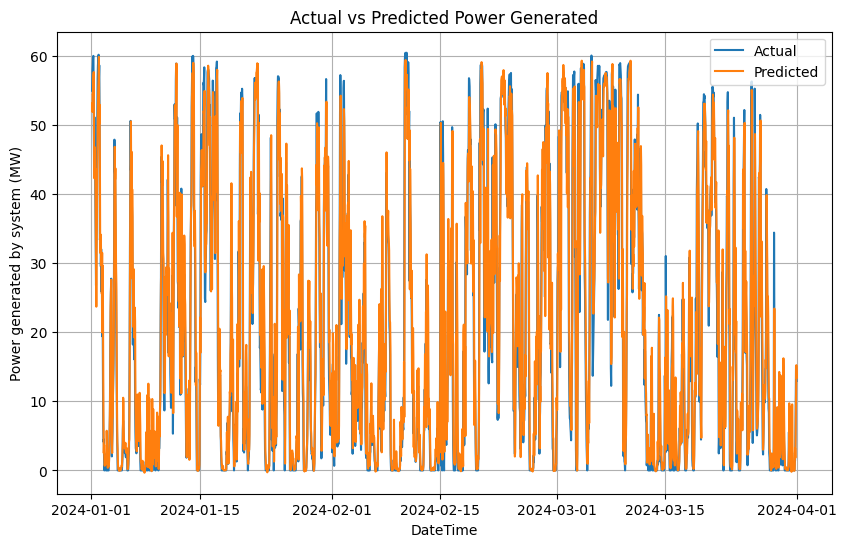

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

try:
    df_val = pd.read_csv("path_to_actual_dataset.csv")
    df_pow = pd.read_csv("path_to_predicted_dataset.csv")
except Exception as e:
    print("")
    exit()

if 'DateTime' not in df_val.columns or 'DateTime' not in df_pow.columns:
    print("Error: 'DateTime' column not found in one or both datasets.")
    exit()

df_val['DateTime'] = pd.to_datetime(df_val['DateTime'])
df_pow['DateTime'] = pd.to_datetime(df_pow['DateTime'])

merged_df = pd.merge(df_val, df_pow, on='DateTime')

merged_df.set_index('DateTime', inplace=True)

correlation_coefficient = merged_df['Power generated by system | (MW)'].corr(merged_df['Power_predicted_values'])

mae = mean_absolute_error(merged_df['Power generated by system | (MW)'], merged_df['Power_predicted_values'])

mse = mean_squared_error(merged_df['Power generated by system | (MW)'], merged_df['Power_predicted_values'])

print("Correlation Coefficient:", correlation_coefficient)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['Power generated by system | (MW)'], label='Actual')
plt.plot(merged_df.index, merged_df['Power_predicted_values'], label='Predicted')
plt.xlabel('DateTime')
plt.ylabel('Power generated by system (MW)')
plt.title('Actual vs Predicted Power Generated')
plt.legend()
plt.grid(True)
plt.show()
